Actividad: Algoritmo de clasificación de Bayes 
Alan Ricardo Vilchis Arceo A01640260

In [2]:
#importar librerias
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar y limpiar base de datos
df = pd.read_csv('/home/alanv/Documents/7/mate/Social_Network_Ads.csv')
df = df.drop(['User ID','Gender'], axis=1)
df.head()


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
#Aplicar algoritmo de clasificación de bayes
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,0:2],df.iloc[:,2], test_size=0.2,random_state=42)
nb = GaussianNB()
nb.fit(x_train,y_train)   
y_pred = nb.predict(x_test)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0])

Text(0.5, 23.52222222222222, 'prediccion')

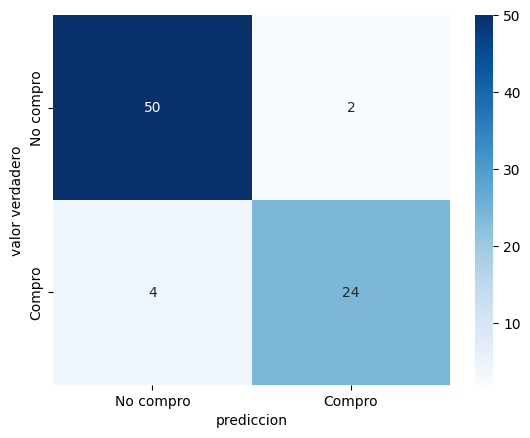

In [4]:
#Graficar matriz de confusion
confusion=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion, annot=True, cmap='Blues')
class_names=['No compro','Compro']
trick_marks=[0.5,1.5]
plt.xticks(trick_marks,class_names)
plt.yticks(trick_marks,class_names)
plt.ylabel('valor verdadero')
plt.xlabel('prediccion')

In [5]:
print('Exactitud del modelo',nb.score(x_test,y_test))

Exactitud del modelo 0.925


Segun los resultados obtenidos llegue a la conclusion que si es en buen modelo, sin embargo antes de hacer pruebas con clientes reales me gustaria realizar otros modelos y diferentes tipos de pruebas, asi como agregar mas variables como el género para asi encontrar una mejor exactitud.

In [6]:
#Algoritmo agregando la variable de genero

# Cargar y limpiar base de datos
df = pd.read_csv('/home/alanv/Documents/7/mate/Social_Network_Ads.csv')
df = df.drop(['User ID'], axis=1)
# Agregar dummies para la variable categorica genero
dummies=pd.get_dummies(df['Gender'],prefix='gender')
df = df.drop(['Gender'],axis=1)
df = pd.concat([dummies,df], axis=1)
#partir los datos y aplicar algoritmo
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,0:4],df.iloc[:,4], test_size=0.2,random_state=42)
nb = GaussianNB()
nb.fit(x_train,y_train)   
y_pred = nb.predict(x_test)
x_train

,gender_Female,gender_Male,Age,EstimatedSalary
3,True,False,27,57000
18,False,True,46,28000
202,True,False,39,134000
250,True,False,44,39000
274,True,False,57,26000
...,...,...,...,...
71,True,False,24,27000
106,True,False,26,35000
270,True,False,43,133000
348,False,True,39,77000


Text(0.5, 23.52222222222222, 'prediccion')

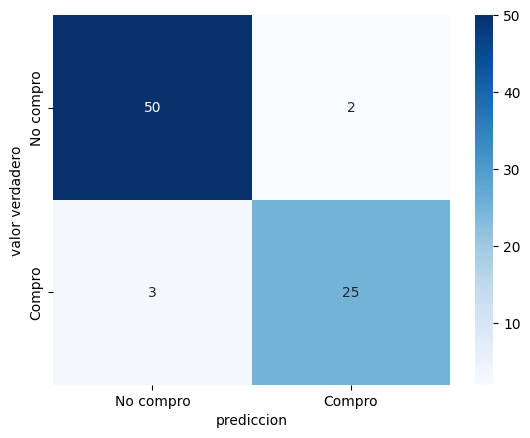

In [7]:
#Graficar matriz de confusion
confusion=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion, annot=True, cmap='Blues')
class_names=['No compro','Compro']
trick_marks=[0.5,1.5]
plt.xticks(trick_marks,class_names)
plt.yticks(trick_marks,class_names)
plt.ylabel('valor verdadero')
plt.xlabel('prediccion')

In [8]:
print('Exactitud del modelo',nb.score(x_test,y_test))

Exactitud del modelo 0.9375


Al agregar la nueva variable se puede notar una mejora en la exactitud del modelo, por lo que supondria que es una buena idea agregar esta variable siempre y cuando sea convertida en una variable numerica.
Alan Ricardo Vilchis Arceo A01640260